In [1]:
%pylab inline
import pandas as pd
# csv files for answer responses
gdrive_path = "/Users/dorislee/Google Drive/Turn/user_study/evaluation_study/transcription_and_analysis/"

Populating the interactive namespace from numpy and matplotlib


In [2]:
user_task =  pd.read_csv(gdrive_path+"UserTaskAssignment.csv")

In [3]:
%load_ext autoreload
%autoreload 2
from paper_visualization import *

# Interested Retrieval

user_click_data.csv generated by running Parsing User Study Clickstream.ipynb

In [4]:
retreival = pd.read_csv(gdrive_path+"user_click_data.csv")

In [5]:
from tabulate import tabulate
import tabulate as T
del(T.LATEX_ESCAPE_RULES[u'\\'])

Equal weighting for interested + uninterested, 0 for no selection

In [6]:
def getDataset(x):
    if 'A' in x:
        return "Police"
    else:
        return "Autism"

In [7]:
retreival["dataset"]=retreival["task"].apply(getDataset)

In [8]:
retreival.loc[retreival["interested"]=="unselected","retreival score"]=0
retreival.loc[retreival["interested"]=="interested","retreival score"]=1
retreival.loc[retreival["interested"]=="not interested","retreival score"]=-1
# retreival score, the higher the better, kind of like a relevance score
relevance = retreival.groupby(["dataset","visualization"]).sum()["retreival score"].reset_index().rename(columns={"retreival score":"relevance score"})
retreival = retreival.merge(relevance)
retreival["result_score"]=retreival["retreival score"]*retreival["relevance score"]

In [9]:
retreival["Condition"] = retreival["task"].apply(lambda x:{1:"Storyboard",2:"Cluster",3:"BFS"}[int(x[1])])

In [13]:
retreival.groupby(["Condition","task"]).count()

user  visualization  interested  dataset  retreival score  \
Condition  task                                                              
BFS        A3      60             60          60       60               60   
           B3      60             60          60       60               60   
Cluster    A2      60             60          60       60               60   
           B2      60             60          60       60               60   
Storyboard A1      60             60          60       60               60   
           B1      60             60          60       60               60   

                 relevance score  result_score  
Condition  task                                 
BFS        A3                 60            60  
           B3                 60            60  
Cluster    A2                 60            60  
           B2                 60            60  
Storyboard A1                 60            60  
           B1                 60            60

In [14]:
retreival.groupby(["interested","dataset","Condition"]).count()

user  visualization  task  retreival score  \
interested     dataset Condition                                                
interested     Autism  BFS           29             29    29               29   
                       Cluster       31             31    31               31   
                       Storyboard    44             44    44               44   
               Police  BFS           32             32    32               32   
                       Cluster       20             20    20               20   
                       Storyboard    22             22    22               22   
not interested Autism  BFS           11             11    11               11   
                       Cluster        5              5     5                5   
                       Storyboard     5              5     5                5   
               Police  BFS            9              9     9                9   
                       Cluster       17             17    17               17   
                       Storyboard     5              5     5                5   
unselected     Autism  BFS           20             20    20               20   
                       Cluster       24             24    24               24   
                       Storyboard    11             11    11               11   
               Police  BFS           19             19    19               19   
                       Cluster       23             23    23               23   
                       Storyboard    33             33    33               33   

                                   relevance score  result_score  
interested     dataset Condition                                  
interested     Autism  BFS                      29            29  
                       Cluster                  31            31  
                       Storyboard               44            44  
               Police  BFS                      32            32  
                       Cluster                  20            20  
                       Storyboard               22            22  
not interested Autism  BFS                      11            11  
                       Cluster                   5             5  
                       Storyboard                5             5  
               Police  BFS                       9             9  
                       Cluster                  17            17  
                       Storyboard                5             5  
unselected     Autism  BFS                      20            20  
                       Cluster                  24            24  
                       Storyboard               11            11  
               Police  BFS                      19            19  
                       Cluster                  23            23  
                       Storyboard               33            33

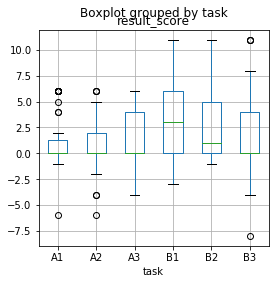

In [15]:
retreival.boxplot("result_score",by="task")

In [16]:
retreival["algo"] = retreival['task'].apply(lambda x: int(x[1]))

In [17]:
sbd_ratings = retreival[retreival["algo"]==1]["result_score"]
clust_ratings = retreival[retreival["algo"]==2]["result_score"]
bfs_ratings = retreival[retreival["algo"]==3]["result_score"]

In [18]:
print (sbd_ratings.mean())
print (clust_ratings.mean())
print (bfs_ratings.mean())

2.2916666666666665
1.9333333333333333
1.775


In [19]:
import scipy

In [20]:
print (scipy.stats.ttest_ind(sbd_ratings,clust_ratings))#,equal_var=True)
print (scipy.stats.mannwhitneyu(sbd_ratings,clust_ratings))

Ttest_indResult(statistic=0.8543172302781582, pvalue=0.39378833638892907)
MannwhitneyuResult(statistic=6671.0, pvalue=0.15315317963021152)


In [21]:
print (scipy.stats.ttest_ind(sbd_ratings,bfs_ratings))#,equal_var=True)
print (scipy.stats.mannwhitneyu(sbd_ratings,bfs_ratings))

Ttest_indResult(statistic=1.2603598599281318, pvalue=0.20877387160312855)
MannwhitneyuResult(statistic=6579.0, pvalue=0.11356649886413389)


In [22]:
sbd_ratings = retreival[retreival["task"]=="A1"]["result_score"]
clust_ratings = retreival[retreival["task"]=="A2"]["result_score"]
bfs_ratings = retreival[retreival["task"]=="A3"]["result_score"]

print (sbd_ratings.mean())
print (clust_ratings.mean())
print (bfs_ratings.mean())

1.0333333333333334
0.8666666666666667
1.65


In [23]:
print (scipy.stats.ttest_ind(sbd_ratings,clust_ratings))#,equal_var=True)
print (scipy.stats.mannwhitneyu(sbd_ratings,clust_ratings))

Ttest_indResult(statistic=0.38171690312609213, pvalue=0.7033578773435586)
MannwhitneyuResult(statistic=1746.0, pvalue=0.3800442172842934)


In [24]:
print (scipy.stats.ttest_ind(sbd_ratings,bfs_ratings))#,equal_var=True)
print (scipy.stats.mannwhitneyu(sbd_ratings,bfs_ratings))

Ttest_indResult(statistic=-1.3891657165816, pvalue=0.16739837193047458)
MannwhitneyuResult(statistic=1552.0, pvalue=0.07497075696867785)


In [25]:
sbd_ratings = retreival[retreival["task"]=="B1"]["result_score"]
clust_ratings = retreival[retreival["task"]=="B2"]["result_score"]
bfs_ratings = retreival[retreival["task"]=="B3"]["result_score"]

print (sbd_ratings.mean())
print (clust_ratings.mean())
print (bfs_ratings.mean())

3.55
3.0
1.9


In [77]:
print (scipy.stats.ttest_ind(sbd_ratings,clust_ratings))#,equal_var=True)
print (scipy.stats.mannwhitneyu(sbd_ratings,clust_ratings))

Ttest_indResult(statistic=0.8418866949507254, pvalue=0.4015543916431473)
MannwhitneyuResult(statistic=1548.5, pvalue=0.0898703244930128)


In [78]:
print (scipy.stats.ttest_ind(sbd_ratings,bfs_ratings))#,equal_var=True)
print (scipy.stats.mannwhitneyu(sbd_ratings,bfs_ratings))

Ttest_indResult(statistic=2.5261617387405035, pvalue=0.012856476707637126)
MannwhitneyuResult(statistic=1294.5, pvalue=0.00349951471014413)


In [25]:
avrg_result = retreival.groupby(["dataset","task"]).mean()["result_score"]

In [26]:
avrg_score_result = [["Police"]+list(avrg_result["Police"]),["Autism"]+list(avrg_result["Autism"])]

In [28]:
print (T.tabulate(avrg_score_result,headers=['Dataset','\system','Cluster','BFS'],tablefmt='latex',floatfmt=".2f"))

\begin{tabular}{lrrr}
\hline
 Dataset   &   \system &   Cluster &   BFS \\
\hline
 Police    &      1.03 &      0.87 &  1.65 \\
 Autism    &      3.55 &      3.00 &  1.90 \\
\hline
\end{tabular}


#### P@k, R@k: say that we only care about top-k retreival

In [24]:
def compute_average_PR_at_k_over_all_data(k):
    retreival["dataset"]=retreival["task"].apply(lambda x:x[0])#.groupby["ideal retreival score"]
    dedup_retreival=retreival[["dataset","visualization","ideal retreival score"]].drop_duplicates()
    
    # get top-k for dataset A and dataset B
    dedup_retreivalA=dedup_retreival[dedup_retreival["dataset"]=='A']
    topk_A = dedup_retreivalA.loc[dedup_retreivalA["ideal retreival score"].nlargest(k,"ideal retreival score").index]
    dedup_retreivalB=dedup_retreival[dedup_retreival["dataset"]=='B']
    topk_B = dedup_retreivalB.loc[dedup_retreivalB["ideal retreival score"].nlargest(k,"ideal retreival score").index]
    topk_A_lst =list(topk_A["visualization"])
    topk_B_lst =list(topk_B["visualization"])
    def compute_PR_at_k(user_id):
        selected_user = retreival[retreival["user"]==user_id]
        relevant = (selected_user["visualization"].isin(topk_A_lst)|selected_user["visualization"].isin(topk_B_lst))
        retreived = (selected_user["interested"]=="interested")
        Nrelevant_and_retreived = float(len(selected_user[(relevant)&(retreived)]))
        Nrelevant = len(selected_user[relevant])
        Nretreived = len(selected_user[retreived])
        if Nrelevant !=0 and Nretreived!=0:
            precision  = Nrelevant_and_retreived/Nrelevant
            recall = Nrelevant_and_retreived/Nretreived
            return precision,recall
        else:
            return 0,0
    # compute PR
    retreival["P@"+str(k)],retreival["R@"+str(k)] = zip(*retreival["user"].apply(compute_PR_at_k))
    return retreival.groupby("task",as_index=False)[["P@"+str(k),"R@"+str(k)]].mean()

In [25]:
# compute_average_PR_at_k_over_all_data(5)